# Библиотеки

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Работа с датасетом

### Загрузим датасет

In [122]:
data = pd.read_csv('https://raw.githubusercontent.com/AnLiMan/Machine-Learning-Course/main/Datasets/apple_quality.csv')

### Отобразим первые 5 элементов

In [123]:
print(data.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  


### Отобразим информацию о нём

In [124]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB
None


### Отобразим размерность датасета

In [125]:
print("Размерность = ", data.shape)

Размерность =  (4000, 9)


### Проверка на нулевые и отсутствующие значения.

In [126]:
print(data.isna().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


### Проверка дубликатов

In [127]:
print(data.duplicated(keep = False).value_counts())
print(data[data.duplicated(keep = False)])

False    4000
dtype: int64
Empty DataFrame
Columns: [A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality]
Index: []


### Выбросим дубликаты из датаста и отобразим новую размерность

In [128]:
data = data.drop_duplicates(keep = 'first').copy()
print(data.shape)

(4000, 9)


### Сброс индекса кадра данных

In [129]:
data = data.reset_index(drop = True)

### Разделим датасет на независимые переменные (X) и целевую функцию (Y)

In [130]:
X = data.iloc[:, 1:8].values
y = data['Quality'].values

### Размерности полученных данных

In [131]:
print("Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = " + str(X.shape))
print("Рамерность Y, строки(общее количество значений), колонны (количество зависмых переменных) = " + str(y.shape))

Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = (4000, 7)
Рамерность Y, строки(общее количество значений), колонны (количество зависмых переменных) = (4000,)


In [132]:
print("Значения Х ")
print(X)

Значения Х 
[[-3.97004852 -2.51233638  5.34632961 ...  1.84490036  0.3298398
  -0.49159048]
 [-1.19521719 -2.83925653  3.66405876 ...  0.8532858   0.86753008
  -0.72280937]
 [-0.29202386 -1.35128199 -1.73842916 ...  2.83863551 -0.03803333
   2.62163647]
 ...
 [-2.6345153  -2.13824672 -2.44046129 ...  2.19970859  4.76385918
  -1.33461139]
 [-4.00800374 -1.77933711  2.36639697 ...  2.16143512  0.21448838
  -2.22971981]
 [ 0.27853965 -1.71550503  0.12121725 ...  1.2666774  -0.77657147
   1.59979646]]


In [133]:
print("Значения Y")
print(y)

Значения Y
['good' 'good' 'bad' ... 'bad' 'good' 'good']


### Нормализация X (перевод значений в диапазон от 0 до 1)

Нормализация входных параметров важна для улучшения стабильности и скорости сходимости обучения. Если входные данные не нормализованы, то некоторые параметры могут иметь большой диапазон значений, что может привести к проблемам в обучении нейронной сети. Например, градиенты могут стать слишком большими или маленькими, что приведет к проблемам в оптимизации и ухудшению точности предсказаний.

Нормализация также позволяет ускорить процесс обучения, поскольку сходимость алгоритма оптимизации может быть улучшена. Правильно нормализованные данные также могут помочь в избежании проблемы переобучения, что может возникнуть, если входные данные не имеют хорошей репрезентативности.

Подробнее https://www.mql5.com/ru/articles/12459#:~:text=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B2%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2%20%D0%B2%D0%B0%D0%B6%D0%BD%D0%B0%20%D0%B4%D0%BB%D1%8F,%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D0%B8%20%D1%83%D1%85%D1%83%D0%B4%D1%88%D0%B5%D0%BD%D0%B8%D1%8E%20%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B9

In [134]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

In [135]:
print("Нормализованные входные данные")
print(X_scaled)

Нормализованные входные данные
[[0.23466869 0.35837018 0.92248438 ... 0.58581883 0.47277002 0.45222503]
 [0.4393314  0.33310697 0.79570617 ... 0.51140848 0.51380745 0.43618517]
 [0.50594806 0.44809229 0.38856738 ... 0.6603883  0.44469332 0.66819226]
 ...
 [0.33317336 0.38727848 0.33566129 ... 0.61244349 0.81118186 0.39374394]
 [0.23186924 0.41501373 0.69791262 ... 0.60957147 0.4639662  0.3316495 ]
 [0.54803101 0.41994644 0.52871284 ... 0.54242922 0.38832684 0.59730634]]


### Преобразование Y с помощью LabelEncoder (текст переводятся в метки (числа))

In [136]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [137]:
print("Новые метки")
print(y_encoded)

Новые метки
[1 1 0 ... 0 1 1]


### Категоривание меток(количество категорий = количеству меток полученных ранее - 0,1,2)

In [138]:
num_categories = 2
y_onehot = keras.utils.to_categorical(y_encoded, num_categories)

In [139]:
print("Новое представление Y")
print(y_onehot)

Новое представление Y
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


### Преобразование X_scaled и y_onehot в train и valid данные.

In [140]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_onehot,
                                                     test_size = 0.2,
                                                     random_state = 42)

In [141]:
print("Тренировочные данные")
print(X_train)

Тренировочные данные
[[0.63683187 0.35305009 0.49645027 ... 0.52664718 0.64304288 0.40105263]
 [0.51523605 0.58231483 0.43646357 ... 0.47180237 0.52263894 0.33565786]
 [0.34243895 0.33278396 0.45564396 ... 0.44022423 0.83767975 0.36108855]
 ...
 [0.70922945 0.42323525 0.4992148  ... 0.34479115 0.7904105  0.57028597]
 [0.40352345 0.4617363  0.64086922 ... 0.47425851 0.48540017 0.4341779 ]
 [0.40057452 0.65367316 0.54047832 ... 0.57304986 0.34877712 0.38533421]]


In [142]:
print("Выходные данные для тренировочных")
print(y_train)

Выходные данные для тренировочных
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [143]:
print("Данные для валидации (проверки)")
print(X_valid)

Данные для валидации (проверки)
[[0.75608945 0.42179677 0.2422959  ... 0.48775725 0.57429767 0.44853653]
 [0.63368095 0.53520642 0.5149469  ... 0.5138364  0.2803134  0.62179288]
 [0.61649552 0.51318241 0.65042065 ... 0.40564511 0.34593166 0.55633307]
 ...
 [0.46363668 0.21505889 0.71550599 ... 0.68628639 0.55388261 0.4158614 ]
 [0.45784404 0.53978142 0.55627892 ... 0.44407299 0.55905147 0.34020947]
 [0.56349826 0.42070965 0.48195066 ... 0.6857207  0.47263582 0.35549331]]


In [144]:
print("Выходные данные для валидации (проверки)")
print(y_valid)

Выходные данные для валидации (проверки)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Работа с нейросетью

### Определение модели нейронной сети

In [145]:
model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape = (7,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = num_categories, activation = 'softmax'))

### Резюме

In [146]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               4096      
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dense_50 (Dense)            (None, 512)               262656    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_51 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 530434 (2.02 MB)
Trainable params: 530434 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Компиляция модели

In [147]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Обучение модели

In [149]:
history = model.fit(X_train, y_train,
          batch_size = 10,
          epochs = 20,
          verbose = 1,
          validation_data = (X_valid, y_valid))

Epoch 1/20
320/320 [==============================] - 2s 5ms/step - loss: 0.3079 - accuracy: 0.8653 - val_loss: 0.3105 - val_accuracy: 0.8650
Epoch 2/20
320/320 [==============================] - 1s 5ms/step - loss: 0.3094 - accuracy: 0.8572 - val_loss: 0.3231 - val_accuracy: 0.8637
Epoch 3/20
320/320 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.8641 - val_loss: 0.2827 - val_accuracy: 0.8975
Epoch 4/20
320/320 [==============================] - 1s 4ms/step - loss: 0.3033 - accuracy: 0.8675 - val_loss: 0.4212 - val_accuracy: 0.8000
Epoch 5/20
320/320 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.8644 - val_loss: 0.3151 - val_accuracy: 0.8600
Epoch 6/20
320/320 [==============================] - 1s 4ms/step - loss: 0.2899 - accuracy: 0.8766 - val_loss: 0.2805 - val_accuracy: 0.8863
Epoch 7/20
320/320 [==============================] - 2s 6ms/step - loss: 0.2883 - accuracy: 0.8684 - val_loss: 0.3079 - val_accuracy: 0.8850
Epoch 

### Графики процесса обучения

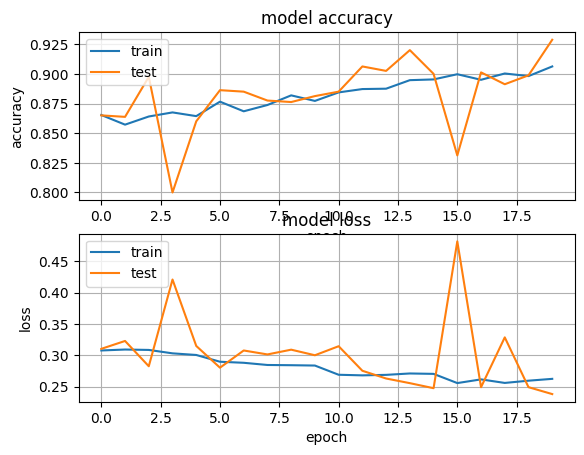

In [168]:
plt.figure()

# обобщение истории для точности
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')

# обобщение истории для потерь
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Выведем фактическое и прогнозируемое значение

In [175]:
y_pred = model.predict(X_valid)

actual = np.argmax(y_valid, axis = 1)
predicted = np.argmax(y_pred, axis = 1)

print(f"Фактическое:    {actual}")
print(f"Предсказанное: {predicted}")

25/25 [==============================] - 0s 1ms/step
Фактическое:    [1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1
 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 